In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['STHeiti']
mpl.rcParams['font.serif'] = ['STHeiti']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['STHeiti', 'STHeiti']})
# Set Default Encoding
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

# 数据信息

In [11]:
funds = pd.read_csv('funds.csv',dtype={'code':str})
funds.head()

,code,name,url,type,manager,company
0,000001,华夏成长,http://fund.eastmoney.com/000001.html,混合型,董阳阳,华夏基金
1,000003,中海可转债A,http://fund.eastmoney.com/000003.html,债券型,江小震,中海基金
2,000004,中海可转债C,http://fund.eastmoney.com/000004.html,债券型,江小震,中海基金
3,000005,嘉实增强信用定期债券,http://fund.eastmoney.com/000005.html,定开债券,刘宁,嘉实基金
4,000007,鹏华国企债债券,http://fund.eastmoney.com/000007.html,债券型,刘涛,鹏华基金


基金信息数据供包含六列，分别为基金代码、基金名字、基金的网址、类型、经理、管理公司。

In [12]:
funds.describe()

,code,name,url,type,manager,company
count,6719,6719,6719,6719,6719,6719
unique,6719,6678,6719,19,1324,123
top,519332,信诚中证800金融指数分级,http://fund.eastmoney.com/150077.html,混合型,许强,博时基金
freq,1,3,1,2609,53,257


共 6719 个基金，总共 19 个类型，经理为 1324 个，管理公司为 123 个。
## 基金类型
查看基金类型及其个数。

In [13]:
funds['type'].value_counts()

混合型         2609
债券型         1319
货币型          672
定开债券         434
股票指数         359
股票型          250
基金规模         157
分级杠杆         151
固定收益         150
QDII         138
ETF-场内       128
联接基金         117
理财型          110
QDII-指数       61
债券指数          48
QDII-ETF       9
混合-FOF         4
其他创新           2
债券创新-场内        1
Name: type, dtype: int64

基金类型细分为 18 个类型，其中最多的为混合型。总的来说，大部分基金为中低风险中低收益类型，如混合型、债券型、货币型等。考虑到不同类型基金可比性不高，挑选混合型的基金出来分析。其原因有：
* 混合型基金的数量较多；
* 相比于货币型、债券型，混合型基金的风险和收益都高，更具有分析价值。

# 混合型基金

In [14]:
mixed_funds = funds[funds['type']==u"混合型"]
mixed_funds.describe()

,code,name,url,type,manager,company
count,2609,2609,2609,2609,2609,2609
unique,2609,2606,2609,1,884,114
top,001823,中欧行业成长混合(LOF),http://fund.eastmoney.com/002517.html,混合型,樊利安,鹏华基金
freq,1,3,1,2609,42,80


管理混合型基金最多的十家公司：

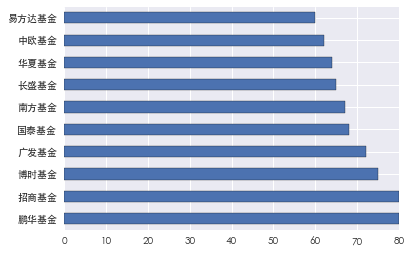

In [15]:
mixed_funds['company'].value_counts()[:10].plot(kind='barh')

管理混合型基金最多的十个经理：

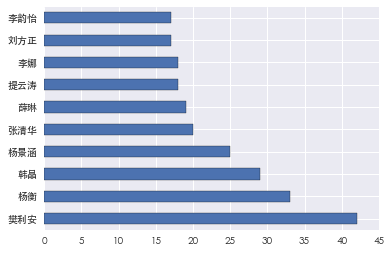

In [16]:
mixed_funds['manager'].value_counts()[:10].plot('barh')

# 混合型基金净值变化数据
考虑到投资收益仅与日涨跌幅有关，仅提取混合型基金净值变化率作为后续分析数据。

In [17]:
mixed_funds_rate = pd.DataFrame(columns=['date'])
for code in mixed_funds['code']:
    data = pd.read_csv('./data/fundNAVData/'+code+'.csv',header=None,names=['date','NAV','accNAV','rate'])
    rate_data = data[['date','rate']]
    rate_data.columns = ['date',code]
    mixed_funds_rate = pd.merge(mixed_funds_rate,rate_data,how='outer',on='date')

In [18]:
mixed_funds_rate.head()

,date,000001,000011,000017,000020,000021,000029,000031,000039,000056,...,710001,710002,720001,730001,730002,740001,750001,750005,762001,770001
0,2017-10-30,-0.57%,0.31%,-0.71%,-0.52%,-0.37%,-0.61%,-0.98%,-1.28%,-0.10%,...,-0.02%,-0.08%,-1.67%,-1.29%,-0.16%,-0.96%,-1.03%,-0.02%,-0.67%,-0.33%
1,2017-10-27,0.32%,0.61%,1.32%,0.17%,0.48%,0.86%,-0.11%,0.99%,0.25%,...,-0.09%,-0.09%,0.45%,-0.16%,0.90%,-0.14%,0.00%,0.09%,-0.13%,0.74%
2,2017-10-26,0.41%,-0.13%,1.09%,0.44%,0.27%,0.31%,0.11%,1.36%,0.05%,...,0.60%,0.19%,0.09%,-0.40%,0.25%,0.55%,-0.26%,0.03%,0.15%,0.44%
3,2017-10-25,0.41%,0.86%,0.37%,1.11%,0.87%,0.68%,0.22%,-0.08%,0.55%,...,2.24%,0.66%,0.32%,0.49%,0.58%,0.49%,0.60%,0.03%,0.05%,0.83%
4,2017-10-24,0.25%,0.79%,0.00%,0.27%,0.11%,0.25%,0.22%,-0.05%,0.40%,...,0.11%,0.13%,0.00%,0.16%,0.50%,-0.07%,0.17%,0.15%,0.26%,0.33%


In [19]:
# set column(date) to datatimeindex
mixed_funds_rate['date'] = pd.to_datetime(mixed_funds_rate['date'])
mixed_funds_rate.set_index('date',inplace=True)
mixed_funds_rate.head()

,000001,000011,000017,000020,000021,000029,000031,000039,000056,000057,...,710001,710002,720001,730001,730002,740001,750001,750005,762001,770001
date,,,,,,,,,,,,,,,,,,,,,
2017-10-30,-0.57%,0.31%,-0.71%,-0.52%,-0.37%,-0.61%,-0.98%,-1.28%,-0.10%,-0.13%,...,-0.02%,-0.08%,-1.67%,-1.29%,-0.16%,-0.96%,-1.03%,-0.02%,-0.67%,-0.33%
2017-10-27,0.32%,0.61%,1.32%,0.17%,0.48%,0.86%,-0.11%,0.99%,0.25%,0.78%,...,-0.09%,-0.09%,0.45%,-0.16%,0.90%,-0.14%,0.00%,0.09%,-0.13%,0.74%
2017-10-26,0.41%,-0.13%,1.09%,0.44%,0.27%,0.31%,0.11%,1.36%,0.05%,0.59%,...,0.60%,0.19%,0.09%,-0.40%,0.25%,0.55%,-0.26%,0.03%,0.15%,0.44%
2017-10-25,0.41%,0.86%,0.37%,1.11%,0.87%,0.68%,0.22%,-0.08%,0.55%,0.33%,...,2.24%,0.66%,0.32%,0.49%,0.58%,0.49%,0.60%,0.03%,0.05%,0.83%
2017-10-24,0.25%,0.79%,0.00%,0.27%,0.11%,0.25%,0.22%,-0.05%,0.40%,0.40%,...,0.11%,0.13%,0.00%,0.16%,0.50%,-0.07%,0.17%,0.15%,0.26%,0.33%


In [23]:
# change the data type
for code in mixed_funds_rate.columns:
    mixed_funds_rate[code] = mixed_funds_rate[code].astype(str).apply(lambda s: s.split('%')[0]).astype(float)

In [26]:
mixed_funds_rate.head()

,000001,000011,000017,000020,000021,000029,000031,000039,000056,000057,...,710001,710002,720001,730001,730002,740001,750001,750005,762001,770001
date,,,,,,,,,,,,,,,,,,,,,
2017-10-30,-0.57,0.31,-0.71,-0.52,-0.37,-0.61,-0.98,-1.28,-0.10,-0.13,...,-0.02,-0.08,-1.67,-1.29,-0.16,-0.96,-1.03,-0.02,-0.67,-0.33
2017-10-27,0.32,0.61,1.32,0.17,0.48,0.86,-0.11,0.99,0.25,0.78,...,-0.09,-0.09,0.45,-0.16,0.90,-0.14,0.00,0.09,-0.13,0.74
2017-10-26,0.41,-0.13,1.09,0.44,0.27,0.31,0.11,1.36,0.05,0.59,...,0.60,0.19,0.09,-0.40,0.25,0.55,-0.26,0.03,0.15,0.44
2017-10-25,0.41,0.86,0.37,1.11,0.87,0.68,0.22,-0.08,0.55,0.33,...,2.24,0.66,0.32,0.49,0.58,0.49,0.60,0.03,0.05,0.83
2017-10-24,0.25,0.79,0.00,0.27,0.11,0.25,0.22,-0.05,0.40,0.40,...,0.11,0.13,0.00,0.16,0.50,-0.07,0.17,0.15,0.26,0.33


In [27]:
mixed_funds_rate.to_csv('mixed_funds_rate.csv')